In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [115]:
filename = 'ex2data2.txt'
data2 = np.loadtxt(filename, delimiter=',')

In [116]:
X2_no1 = data2[:, 0:2]
y2 = data2[:, 2:]

In [117]:
def pltdata(data):
    ax = plt.subplot(111)
    data1 = data[np.where(data2==1)[0]]
    data0 = data[np.where(data2==0)[0]]
    ax.scatter(data0[:, 0:1], data0[:, 1:2], marker='x', c='r', label='y=0')
    ax.scatter(data1[:, 0:1], data1[:, 1:2], marker='o', c='b', label='y=1')
    ax.legend(loc=0)
    return ax

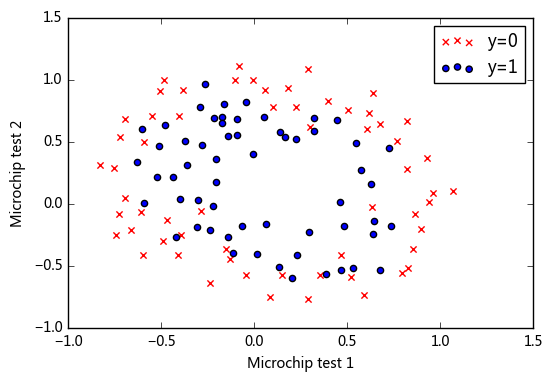

In [118]:
ax2 = pltdata(data2)
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.show()

In [119]:
def featureMap(dataX, degree):
    m, n = dataX.shape
    theta = np.ones((m, 1))
    for i in range(1, degree+1):
        for j in range(i+1):
            X_temp = (dataX[:, 0:1]**(i-j))*(dataX[:, 1:2]**(j))
            theta = np.c_[(theta, X_temp)]
    return theta

In [120]:
X2 = featureMap(X2_no1, 6)
theta2 = np.zeros((X2.shape[1], 1))

In [121]:
def sigmoid(theta, X):
    z = X.dot(theta)
    g = 1/(1+np.exp(-z))
    return g
    
def costFunction(theta, X, y, lamda):
    m = len(y)
    h = sigmoid(theta, X)
    theta_1 = theta[1:,:]
    J = 1/m*(-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h))) + lamda/(2*m)*theta_1.T.dot(theta_1)
    return J

In [122]:
costFunction(theta2, X2, y2, 1)

array([[ 0.69314718]])

In [145]:
def gradientd(theta, X, y, alpha, iter_num, lamda):
    m = len(y)
    
    i = 0
    cost = []
    while i <= iter_num:
        theta_1 = theta[1:,:]
        h = sigmoid(theta, X)
        cost_hist = costFunction(theta, X, y, lamda)
        theta = theta - alpha * 1/m *((X.T).dot(h-y)) 
        theta[1:, :] -= lamda/m*theta_1
        
        cost.append(cost_hist[0])
        i += 1
    return [cost, theta]

In [234]:
gdout = gradientd(theta2, X2, y2, 1, 1000, 1)
cost_hist = gdout[0]
theta2_optim = gdout[1]

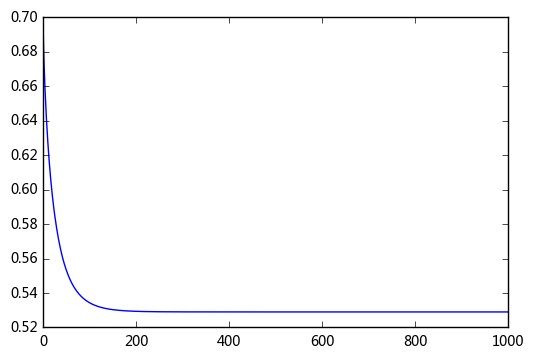

In [235]:
#x = list(range(len(cost_hist)))
#y = [ i for i in aa]
plt.plot(cost_hist)
plt.show()

In [236]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((m, 1))
    k = np.where(sigmoid(theta, X) >= 0.5)[0]
    p[k]= 1
    return p
p2 = predict(theta2_optim, X2)
acc = (p2==y2).mean()
print(acc)

0.830508474576


C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\wanmoer\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


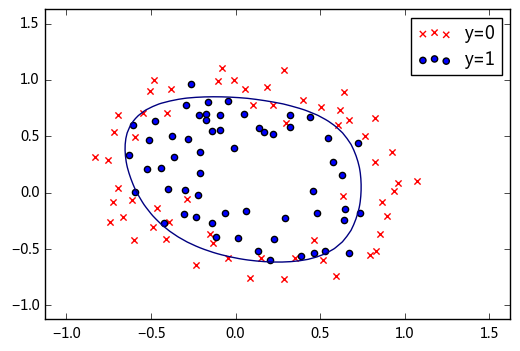

In [239]:
#plot boundary
import matplotlib.pyplot as plt
ax40 = pltdata(data2)
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = featureMap(np.array([[u[i],v[j]]]),6).dot(theta2_optim)
z = z.T
ax40.contour(u, v, z, 0)
plt.show()